In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score

In [2]:
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

In [3]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [4]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [5]:
print(customers.isnull().sum())
print(transactions.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [8]:
customer_data = pd.merge(customers, transactions, on='CustomerID')
customer_data.head(20)

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 03:12:55,2,114.60,57.30
1,C0001,Lawrence Carroll,South America,2022-07-10,T00932,P022,2024-09-17 09:01:18,3,412.62,137.54
2,C0001,Lawrence Carroll,South America,2022-07-10,T00085,P096,2024-04-08 00:01:00,2,614.94,307.47
3,C0001,Lawrence Carroll,South America,2022-07-10,T00445,P083,2024-05-07 03:11:44,2,911.44,455.72
4,C0001,Lawrence Carroll,South America,2022-07-10,T00436,P029,2024-11-02 17:04:16,3,1300.92,433.64
5,C0002,Elizabeth Lutz,Asia,2022-02-13,T00155,P095,2024-07-12 10:18:13,2,454.52,227.26
6,C0002,Elizabeth Lutz,Asia,2022-02-13,T00129,P004,2024-06-11 23:59:08,4,382.76,95.69
7,C0002,Elizabeth Lutz,Asia,2022-02-13,T00148,P019,2024-02-28 07:44:21,2,770.74,385.37
8,C0002,Elizabeth Lutz,Asia,2022-02-13,T00675,P071,2024-12-03 01:41:41,2,254.72,127.36
9,C0003,Michael Rivera,South America,2024-03-07,T00462,P025,2024-06-03 19:17:36,3,853.86,284.62


In [25]:
# Aggregate transaction data per customer (e.g., total spend, number of transactions)
customer_transactions = customer_data.groupby('CustomerID').agg(
    total_spend=('TotalValue', 'sum'),
    transaction_count=('TotalValue', 'count')
).reset_index()

In [26]:
# Merge this with the customer profile data
customer_profile = pd.merge(customers, customer_transactions, on='CustomerID')
print(customer_profile.head())

  CustomerID        CustomerName         Region  SignupDate  total_spend  \
0      C0001    Lawrence Carroll  South America  2022-07-10      3354.52   
1      C0002      Elizabeth Lutz           Asia  2022-02-13      1862.74   
2      C0003      Michael Rivera  South America  2024-03-07      2725.38   
3      C0004  Kathleen Rodriguez  South America  2022-10-09      5354.88   
4      C0005         Laura Weber           Asia  2022-08-15      2034.24   

   transaction_count  
0                  5  
1                  4  
2                  4  
3                  8  
4                  3  


In [27]:
features = customer_profile[[ 'total_spend', 'transaction_count']]
features.head()

,total_spend,transaction_count
0,3354.52,5
1,1862.74,4
2,2725.38,4
3,5354.88,8
4,2034.24,3


In [28]:
# Select only numeric columns (do NOT apply get_dummies on 'total_spend')
numeric_features = features[['total_spend', 'transaction_count']]  

# Normalize numeric features
scaler = StandardScaler()
normalized_features = scaler.fit_transform(numeric_features)

# Check the normalized values
print(normalized_features[:5])

[[-0.06170143 -0.01145819]
 [-0.87774353 -0.46749414]
 [-0.40585722 -0.46749414]
 [ 1.03254704  1.35664965]
 [-0.78392861 -0.92353008]]


In [30]:
# K-Means clustering (choosing a number of clusters between 2 and 10)
n_clusters = 5  # You can choose any number between 2 and 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
customer_profile['Cluster'] = kmeans.fit_predict(normalized_features)

# Check the assigned clusters
print(customer_profile[['CustomerID', 'Cluster']].head(10))

  CustomerID  Cluster
0      C0001        0
1      C0002        0
2      C0003        0
3      C0004        1
4      C0005        0
5      C0006        2
6      C0007        0
7      C0008        1
8      C0009        3
9      C0010        0


In [31]:
# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(normalized_features, customer_profile['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 0.7684193031785918


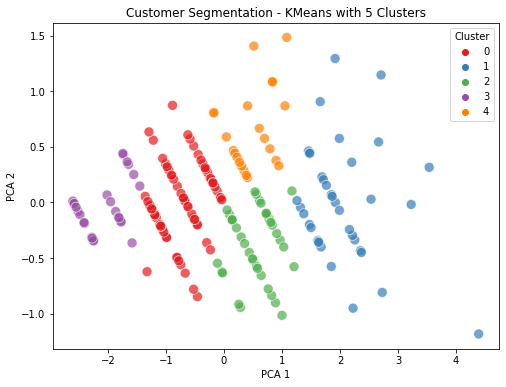

In [32]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(normalized_features)

# Plotting the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=customer_profile['Cluster'], palette='Set1', s=100, alpha=0.7)
plt.title(f'Customer Segmentation - KMeans with {n_clusters} Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()

In [34]:
from sklearn.metrics import silhouette_score
# Calculate Silhouette Score
silhouette_avg = silhouette_score(normalized_features, customer_profile['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

# Inertia (sum of squared distances to centroids)
print(f'Inertia: {kmeans.inertia_}')

Silhouette Score: 0.40258813522360876
Inertia: 64.15871876622481
